<a href="https://colab.research.google.com/github/C0dexi/myRespo/blob/main/p1projectcvdone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import random
import os
import datetime

from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def img_show(img,colorbar=False):
    plt.figure(figsize=(10,8))
    plt.imshow(img,cmap='Greys_r')
    if colorbar:
        plt.colorbar()
    plt.show()

In [19]:
from google.colab import files
uploaded = files.upload() # test digit file

Saving emnist-digits-test.csv to emnist-digits-test.csv


In [20]:
from google.colab import files
uploaded = files.upload() # train digit file

Saving emnist-digits-train.csv to emnist-digits-train.csv


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Current DataSet Path
PATH = '/content/drive/MyDrive/upwork/11_alphabet_recognition'
%cd /content/drive/MyDrive/upwork/11_alphabet_recognition/

In [27]:
trainDataFile = '/content/drive/MyDrive/upwork/11_alphabet_recognition/emnist-digits-test.csv'
testDataFile = '/content/drive/MyDrive/upwork/11_alphabet_recognition/emnist-digits-train.csv'

In [28]:
train=pd.read_csv(trainDataFile, header=None)
test = pd.read_csv(testDataFile, header=None)

In [29]:
print('Shape of EMNIST Digits train Data:')
print(train.shape)
print('Shape of the EMNIST Digits test Data: ')
print(test.shape)
print('Printing top 5 rows:')
test.head()

Shape of EMNIST Digits train Data:
(40000, 785)
Shape of the EMNIST Digits test Data: 
(140994, 785)
Printing top 5 rows:


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# # Getting the Special character for '-' '~':
# train_sp = train[train[0]== 36].reset_index(drop=True)
# test_sp = test[test[0]== 36].reset_index(drop=True)
# train_sp[0]=10
# test_sp[0]=10

train = train[train[0]<= 9].reset_index(drop=True)
test = test[test[0]<= 9].reset_index(drop=True)
train.head()

# print('Shape of the train ~ character')
# print(train_sp.shape)
# print('Shape of the test ~ character')
# print(test_sp.shape)

# train=train.append(train_sp, ignore_index=True)
# test=test.append(test_sp, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
print(train.shape)
print(test.shape)

(40000, 785)
(140994, 785)


In [32]:
train_blanks = train.head(2400) * 0
train_blanks[0]=10

test_blanks = train.head(400) * 0
test_blanks[0]=10

In [33]:
train_blanks.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
39995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39999,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


make change to fix error:
pd.concat insted of append?

---
fixed!


In [39]:
train = pd.concat([train, train_blanks], ignore_index=True)
test = pd.concat([test, test_blanks], ignore_index=True)

In [40]:
print(train.shape)
print(test.shape)

(42400, 785)
(141394, 785)


In [41]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
42395,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42396,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42397,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42398,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42399,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# train.head()
#For Digits
eq_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
characts = ['0','1','2','3','4','5','6','7','8','9','~']

#For Letters
#eq_digits = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,35, 36]
#characts = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','~']

#For Capital Letters & Digits
#eq_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 36, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,35]
#characts = ['0','1','2','3','4','5','6','7','8','9','~','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

ids = {'orig':eq_digits,
      'new': characts}
ids = dict(zip(ids['orig'], ids['new']))

# train[0]=train[0].replace(ids)
# test[0]=test[0].replace(ids)
# train.tail()

In [43]:
print(ids[10])
print(len(characts))
print(len(eq_digits))

~
11
11


In [44]:
test.iloc[[4399]]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
4399,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# x: data and y: labels
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [46]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y_train.head()

,0
0,0
1,9
2,7
3,9
4,2


In [48]:
# store labels for visualization
train_labels = y_train
test_labels = y_test

In [49]:
train_labels

,0
0,0
1,9
2,7
3,9
4,2
...,...
42395,10
42396,10
42397,10
42398,10


erorr fix by using google gemini different imports fixed!!

In [51]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical using to_categorical
y_train = to_categorical(y_train, num_classes=len(eq_digits))
y_test = to_categorical(y_test, num_classes=len(eq_digits))

print(y_train[0])
print(y_train.shape)
print(y_test.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(42400, 11)
(141394, 11)


In [52]:
del train, test

In [53]:
x_train.shape

(42400, 784)

In [54]:
# normalize
x_train = x_train/255
x_test = x_test/255

In [55]:
def transpose(image):
    image = image.reshape([28, 28])
    image = np.transpose(image) #flip+rot90
    return image.reshape([28 * 28])

In [56]:
# flip_and_rotate
x_train = np.apply_along_axis(transpose, 1, x_train)
x_test = np.apply_along_axis(transpose, 1, x_test)

In [57]:
x_train.shape

(42400, 784)

In [58]:
# which sample to look at
samplenum = 1

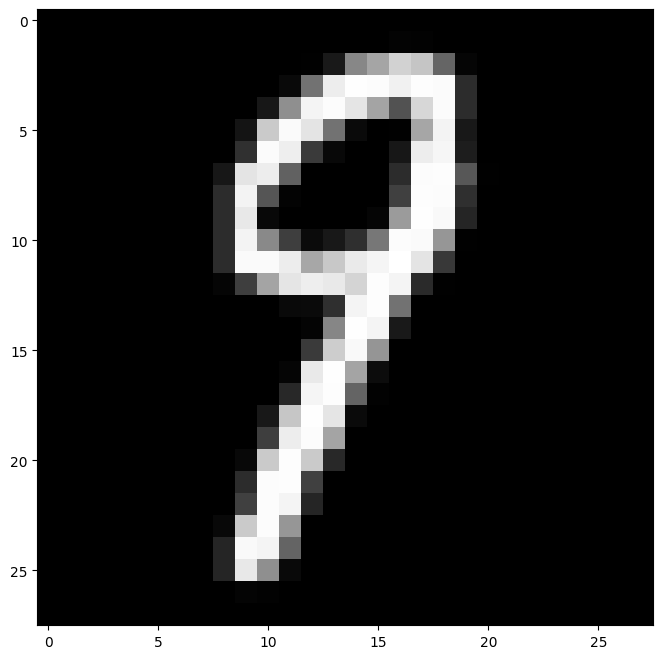

In [59]:
import matplotlib.pyplot as plt

img = x_train[samplenum].reshape([28, 28])

# visualize image
img_show(img)

In [60]:
# show label for sample image
y_train[samplenum][0]

0.0

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42400, 784)
(42400, 11)
(141394, 784)
(141394, 11)


In [62]:
%tensorflow_version 2.x
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


In [63]:
print(tf.reshape(x_test, [-1, 28, 28, 1])[0].shape)

(28, 28, 1)


In [64]:
x_train = tf.reshape(x_train, [-1, 28, 28, 1])
x_test = tf.reshape(x_test, [-1, 28, 28, 1])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42400, 28, 28, 1)
(42400, 11)
(141394, 28, 28, 1)
(141394, 11)


In [65]:
model_best = models.Sequential()
model_best.add( layers.Conv2D(16, 4, input_shape=(28,28,1), activation='relu') )
model_best.add( layers.MaxPooling2D(2) )
model_best.add( layers.Conv2D(32, 4, activation='relu') )
model_best.add( layers.MaxPooling2D(2) )
model_best.add( layers.Flatten() )
model_best.add( layers.Dropout(0.4) )
model_best.add( layers.Dense(100, activation='relu') )
model_best.add( layers.Dense(len(eq_digits), activation='softmax') )

model_best.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 16)          │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 32)            │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,111 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,907 (237.92 KB)

 Trainable params: 60,907 (237.92 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
#Compile model
model_best.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [67]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


error: fix with gemini yes but not sure

In [74]:
# Save the model
SaveModelDir="/content/drive/MyDrive/upwork"
checkpoint_path = SaveModelDir+"/cp.ckpt.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)
metric = 'val_acc'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor=metric, save_weights_only=False, save_best_only = True, verbose=1)


#Save complete Model
# Added the .keras extension to the filename
model_best.save(SaveModelDir+"/Model_2_digits.keras")

#model.save('/content/drive/My Drive/FD EDU Official/AI & Data Science/OCR/Upwork Mission/internal work done/my_model.h5') # this line can also be used to save the model with a .h5 extension

In [75]:
history_best = model_best.fit(x_train, y_train, validation_data=(x_test,y_test),  batch_size=200, epochs=100, callbacks=[cp_callback])


Epoch 1/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - acc: 0.7189 - loss: 0.9075
Epoch 1: val_acc improved from -inf to 0.96086, saving model to /content/drive/MyDrive/upwork/cp.ckpt.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 46s 209ms/step - acc: 0.7195 - loss: 0.9055 - val_acc: 0.9609 - val_loss: 0.1283
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.9536 - loss: 0.1524
Epoch 2: val_acc improved from 0.96086 to 0.97027, saving model to /content/drive/MyDrive/upwork/cp.ckpt.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 75s 180ms/step - acc: 0.9537 - loss: 0.1524 - val_acc: 0.9703 - val_loss: 0.0977
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.9696 - loss: 0.1009
Epoch 3: val_acc improved from 0.97027 to 0.97884, saving model to /content/drive/MyDrive/upwork/cp.ckpt.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - acc: 0.9696 - loss: 0.1009 - val_acc: 0.9788 - val_loss: 0.0688
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - acc: 0.9748 - loss: 0.0821
Epoch 

error detected using gemini fix in another cell FIXED

In [77]:
import tensorflow as tf

model = tf.keras.models.load_model(SaveModelDir+'/Model_2_digits.keras')
# Make sure to include the '.keras' extension when loading the model

# Check its architecture
model.summary()

# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 16)          │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 32)            │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,111 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,816 (475.85 KB)

 Trainable params: 60,907 (237.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,909 (237.93 KB)

4419/4419 - 26s - 6ms/step - acc: 0.9936 - loss: 0.0360
Restored model, accuracy: 99.36%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


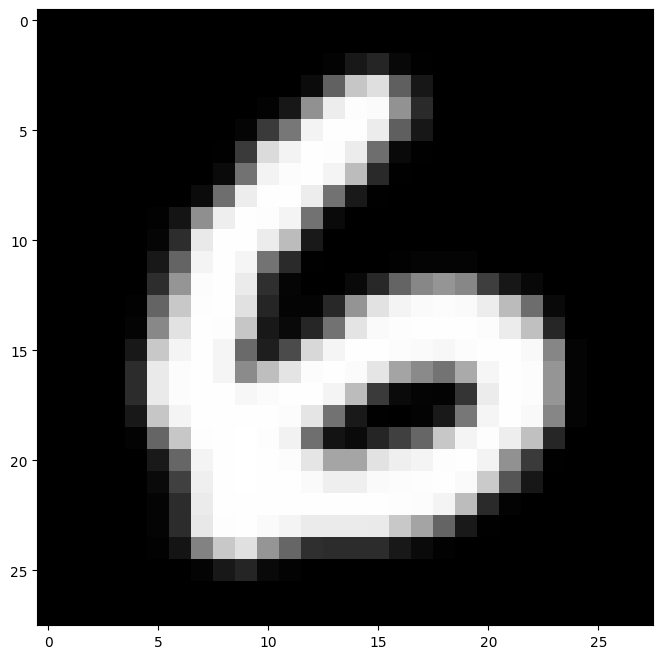

Reality:    6
Prediction: 6


In [78]:
sample_num = 10
true_vect = y_train[sample_num]
pred_vect = model.predict(x_train[sample_num:sample_num+1])
img_show(tf.reshape(x_train[sample_num:sample_num+1],[28, 28]))


#labels = ['0','1','2','3','4','5','6','7','8','9','~','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
labels = ['0','1','2','3','4','5','6','7','8','9','~']
print("Reality:    "+labels[np.argmax(true_vect)])
print("Prediction: "+labels[np.argmax(pred_vect)])

In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [80]:
# calculate confusion matrix
from sklearn.metrics import confusion_matrix
preds = np.argmax(model.predict(x_test),axis=1)
trues = np.argmax(y_test,axis=1)

print(preds.shape)
print(trues.shape)
cnf_matrix = confusion_matrix(trues, preds)

4419/4419 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step
(141394,)
(141394,)


error used gemini fix FIXED

4419/4419 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step
(141394,)
(141394,)
Normalized confusion matrix


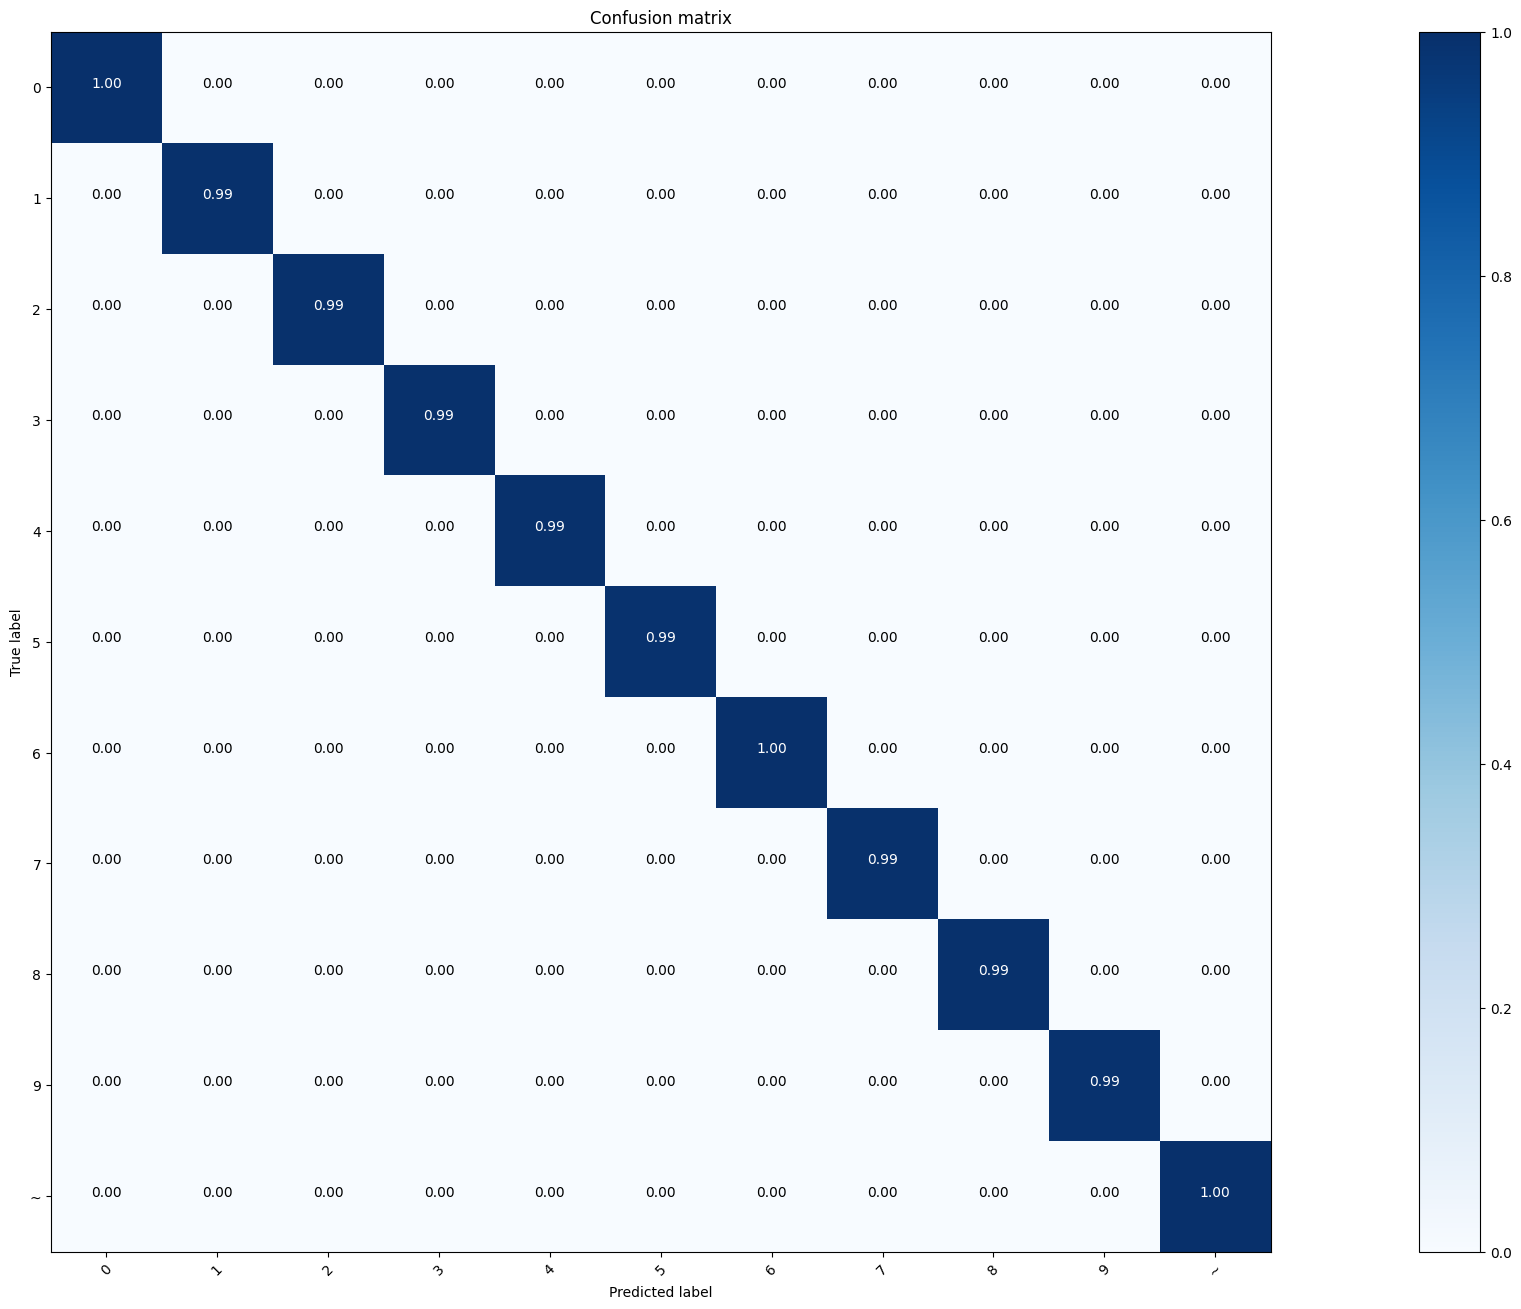

In [82]:
# calculate confusion matrix
from sklearn.metrics import confusion_matrix
import itertools # Import the itertools module
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import numpy as np # Import the numpy module

preds = np.argmax(model.predict(x_test),axis=1)
trues = np.argmax(y_test,axis=1)

print(preds.shape)
print(trues.shape)
cnf_matrix = confusion_matrix(trues, preds)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # Use the imported itertools module
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot normalized confusion matrix
plt.figure(figsize=(30,13))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True)

plt.show()

In [83]:
#rendomImages = random.sample(x_test, 10)
x_test10 = x_test[:10,:,:,:]
y_test10 = y_test[:10]
print("Labels of Orignal top 10 Charectors:")
for i in range(10):
  print(labels[np.argmax(y_test10[i])], end=" ")
print("\nLabels of Recognized top 10 Charectors:")
start_time = time.time() *1000

preds = model_best.predict(x_test10)
print(np.argmax(preds, axis=1))

end_time = time.time() * 1000
print("The computional time (ms) for the 10 Charectors is: ")
print(end_time - start_time)

# for i in range(len(x_test10)):
#   pred_vect = model.predict(charac)


Labels of Orignal top 10 Charectors:
8 9 6 3 6 6 7 1 9 0 
Labels of Recognized top 10 Charectors:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[8 9 6 5 6 6 7 1 9 0]
The computional time (ms) for the 10 Charectors is: 
225.6015625
